In [1]:
import xarray as xr
import numpy as np

In [ ]:
disk = '/gws/nopw/j04/htap2/ptg21/OPT/emianox/'

In [2]:
CMIP6_NO_anthro = xr.open_dataset(disk+'NO_anthropogenic_1849_2015_time_series.nc')
CMIP6_NO_anthro_1995_2014 = CMIP6_NO_anthro.sel(time = slice('1994-12-01','2014-01-01'))
CMIP6_NO_anthro_1995_data = CMIP6_NO_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01')).emissions_NO.data
const_1995_ems  = np.zeros((19*12+1,1,144,192))
const_1995_ems[0,...] = CMIP6_NO_anthro_1995_data[-1,...]
for ivar in range (0,19):
    const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,:,:] = CMIP6_NO_anthro_1995_data[1:]

CMIP6_NO_anthro_const_1995 = CMIP6_NO_anthro_1995_2014.copy(deep=True)
CMIP6_NO_anthro_const_1995.emissions_NO.data = const_1995_ems
CMIP6_NO_anthro_const_1995.to_netcdf('1995_2014_NO_anthro.nc')

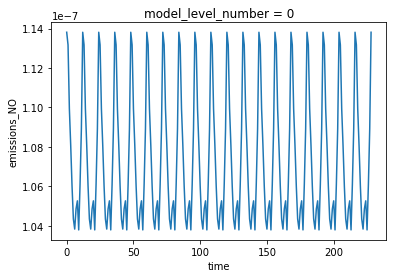

In [3]:
CMIP6_NO_anthro_const_1995['emissions_NO'].resample(time='Y').sum(dim=['latitude','longitude']).plot()

In [4]:
xr.open_dataset('1995_2014_NO_anthro.nc')

<xarray.Dataset>
Dimensions:             (time: 229, model_level_number: 1, latitude: 144, longitude: 192, bnds: 2)
Coordinates:
  * time                (time) object 1994-12-16 00:00:00 ... 2013-12-16 00:0...
  * model_level_number  (model_level_number) int32 0
  * latitude            (latitude) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
  * longitude           (longitude) float64 0.9375 2.812 4.688 ... 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    emissions_NO        (time, model_level_number, latitude, longitude) float32 ...
    latitude_longitude  int32 ...
    time_bnds           (time, bnds) object ...
    latitude_bnds       (latitude, bnds) float64 ...
    longitude_bnds      (longitude, bnds) float64 ...
Attributes:
    history:               2018-09-24T17:34:06: regrid_ancil.py -s /group_wor...
    update_freq_in_hours:  120
    update_type:           1
    Conventions:           CF-1.5
    code_repository_url:   https://code.metoffice.gov.uk/svn/ancil/contrib/tr...
    source_checksum:       5342ea63f54a3c16e2d87e6c38ad8e0a\n6bf542a85f8c10c5...
    source_file:           /group_workspaces/jasmin2/cmip6_prep/cmip6_ancils/...

In [5]:
CMIP6_NO_aircrft = xr.open_dataset(disk+'NO_aircrft_anthropogenic_1849_2015_time_series.nc')
CMIP6_NO_aircrft_1995_2014 = CMIP6_NO_aircrft.sel(time = slice('1994-12-01','2014-01-01'))
CMIP6_NO_aircrft_1995_data = CMIP6_NO_aircrft_1995_2014.sel(time = slice('1994-12-01','1996-01-01')).emissions_NO_aircrft.data
const_1995_ems  = np.zeros((19*12+1,85,144,192))
const_1995_ems[0,...] = CMIP6_NO_aircrft_1995_data[-1,...]
for ivar in range (0,19):
    const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,:,:] = CMIP6_NO_aircrft_1995_data[1:]

CMIP6_NO_aircrft_const_1995 = CMIP6_NO_aircrft_1995_2014.copy(deep=True)
CMIP6_NO_aircrft_const_1995.emissions_NO_aircrft.data = const_1995_ems
CMIP6_NO_aircrft_const_1995.to_netcdf('1995_2014_NO_aircrft.nc')

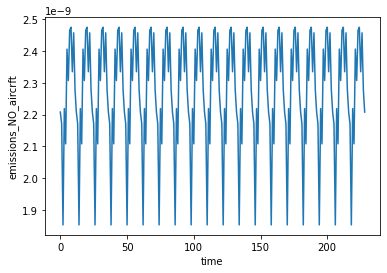

In [7]:
CMIP6_NO_aircrft_const_1995['emissions_NO_aircrft'].resample(time='Y').sum(dim=['latitude','longitude','model_level_number']).plot()